In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparasitions

In [2]:
df = pd.read_csv('HappinessAlcoholConsumption.csv')
df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [3]:
df.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
q1 = df['HappinessScore'].describe()['25%']
q3 = df['HappinessScore'].describe()['75%']
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
print(IQR)

1.9487499999999995


In [6]:
outlier = df[(df['HappinessScore']>lower) | (df['HappinessScore']<upper)]
print(outlier.shape)
print(df['HappinessScore']>lower)
print(df['HappinessScore']<upper)

(122, 9)
0      True
1      True
2      True
3      True
4      True
       ... 
117    True
118    True
119    True
120    True
121    True
Name: HappinessScore, Length: 122, dtype: bool
0      True
1      True
2      True
3      True
4      True
       ... 
117    True
118    True
119    True
120    True
121    True
Name: HappinessScore, Length: 122, dtype: bool


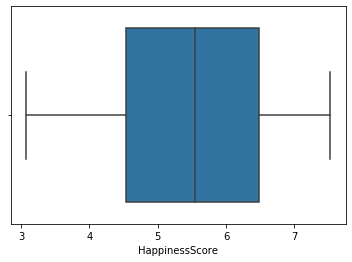

In [7]:
sns.boxplot(x=df.HappinessScore)

In [8]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


Data terlihat tidak memiliki NaN Value atau Missing Value

In [10]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [11]:
df.Region.value_counts()

Sub-Saharan Africa                 28
Central and Eastern Europe         27
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    11
Southeastern Asia                   5
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [12]:
pd.DataFrame(dict(df['Region'].value_counts()).items(), columns = ['Region','Numbers'])

,Region,Numbers
0,Sub-Saharan Africa,28
1,Central and Eastern Europe,27
2,Latin America and Caribbean,23
3,Western Europe,20
4,Middle East and Northern Africa,11
5,Southeastern Asia,5
6,Eastern Asia,4
7,North America,2
8,Australia and New Zealand,2


In [13]:
df.columns

Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'],
      dtype='object')

Tandai nilai maksimum dari setiap column yang ada di dalam dataset

In [14]:
df.head()
original = df.copy()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color : limegreen' if v else '' for v in is_max]

df.style.apply(highlight_max, subset=[
    'HappinessScore',
    'HDI',
    'GDP_PerCapita',
    'Beer_PerCapita',
    'Spirit_PerCapita',
    'Wine_PerCapita'])

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526000,928,53.579000,224,81,278
1,Switzerland,Western Europe,north,7.509000,943,79.866000,185,100,280
2,Iceland,Western Europe,north,7.501000,933,60.530000,233,61,78
3,Norway,Western Europe,north,7.498000,951,70.890000,169,71,129
4,Finland,Western Europe,north,7.413000,918,43.433000,263,133,97
5,Canada,North America,north,7.404000,922,42.349000,240,122,100
6,Netherlands,Western Europe,north,7.339000,928,45.638000,251,88,190
7,New Zealand,Australia and New Zealand,south,7.334000,915,40.332000,203,79,175
8,Australia,Australia and New Zealand,south,7.313000,938,49.897000,261,72,212
9,Sweden,Western Europe,north,7.291000,932,51.845000,152,60,186


Nilai maksimum dari masing-masing column berdasarkan negara
- Happiness Score = Denmark
- HDI (Human Development Index) = Norwegia
- GDP per Capita = Senegal
- Beer per Capita = Namibia
- Spirit per Capita = Belarus
- Wine per Capita = France

In [15]:
correlation = df[['HappinessScore','HDI','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']].corr(method='spearman')
correlation

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.805739,0.229842,0.525883,0.371074,0.470146
HDI,0.805739,1.000000,0.333537,0.607389,0.454871,0.750386
GDP_PerCapita,0.229842,0.333537,1.000000,0.081485,-0.049834,0.261609
Beer_PerCapita,0.525883,0.607389,0.081485,1.000000,0.463499,0.601451
Spirit_PerCapita,0.371074,0.454871,-0.049834,0.463499,1.000000,0.342377
Wine_PerCapita,0.470146,0.750386,0.261609,0.601451,0.342377,1.000000


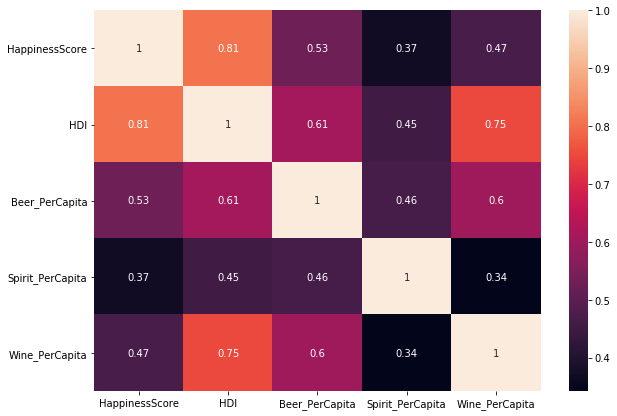

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True)
plt.show()

In [17]:
correlation.drop('GDP_PerCapita',axis=1,inplace=True)
correlation.drop('GDP_PerCapita',axis=0,inplace=True)
correlation

,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.805739,0.525883,0.371074,0.470146
HDI,0.805739,1.000000,0.607389,0.454871,0.750386
Beer_PerCapita,0.525883,0.607389,1.000000,0.463499,0.601451
Spirit_PerCapita,0.371074,0.454871,0.463499,1.000000,0.342377
Wine_PerCapita,0.470146,0.750386,0.601451,0.342377,1.000000


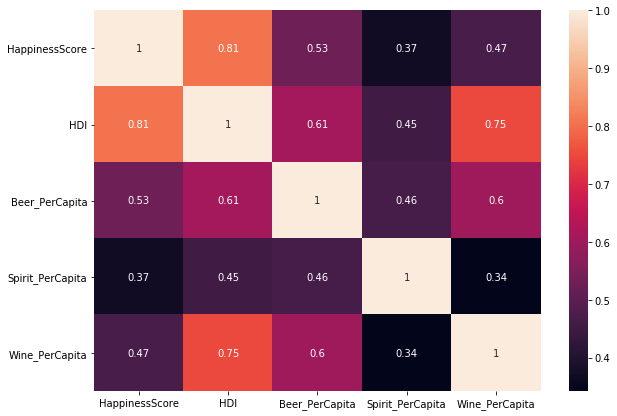

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True)
plt.show()

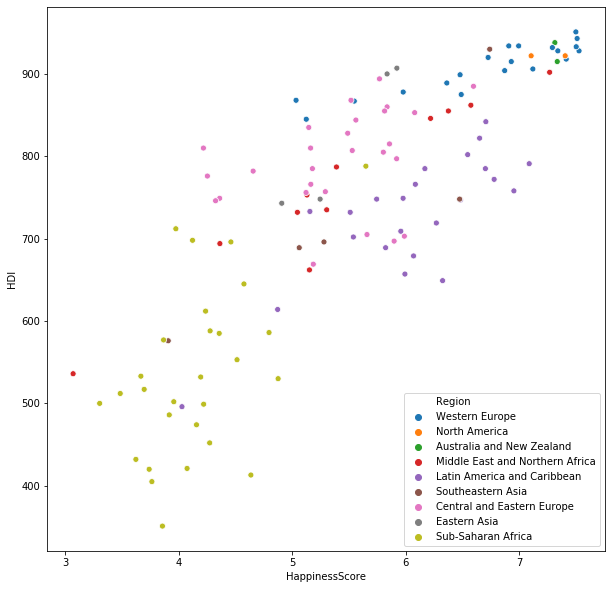

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='HappinessScore', y='HDI', hue='Region')

# Basic Visualization

### Happiness Score

- **Happiness Score x Region**

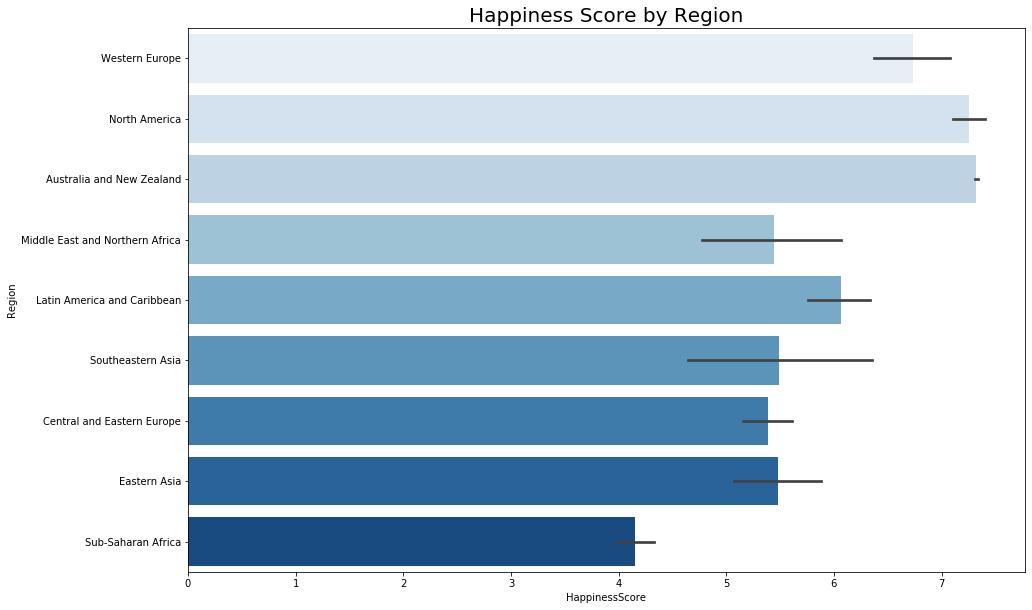

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='HappinessScore', y='Region', palette='Blues')
plt.title('Happiness Score by Region', fontsize = 20)
plt.show()

- **Happiness Score x Country**

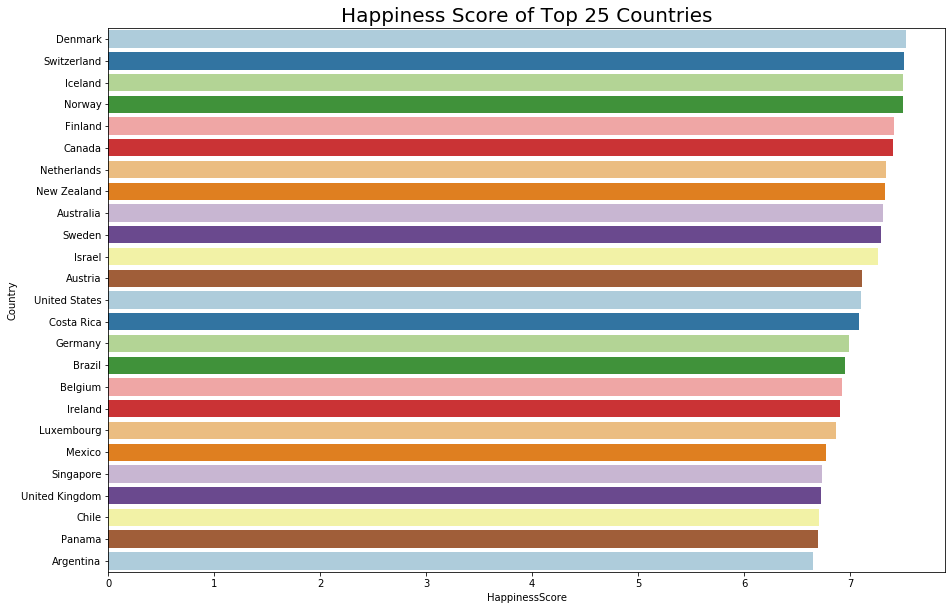

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(data=df.nlargest(25,'HappinessScore'), x='HappinessScore', y='Country', palette='Paired')
plt.title('Happiness Score of Top 25 Countries', fontsize = 20)
plt.show()

### GDP per Capita

- **GDP per Capita x Region**

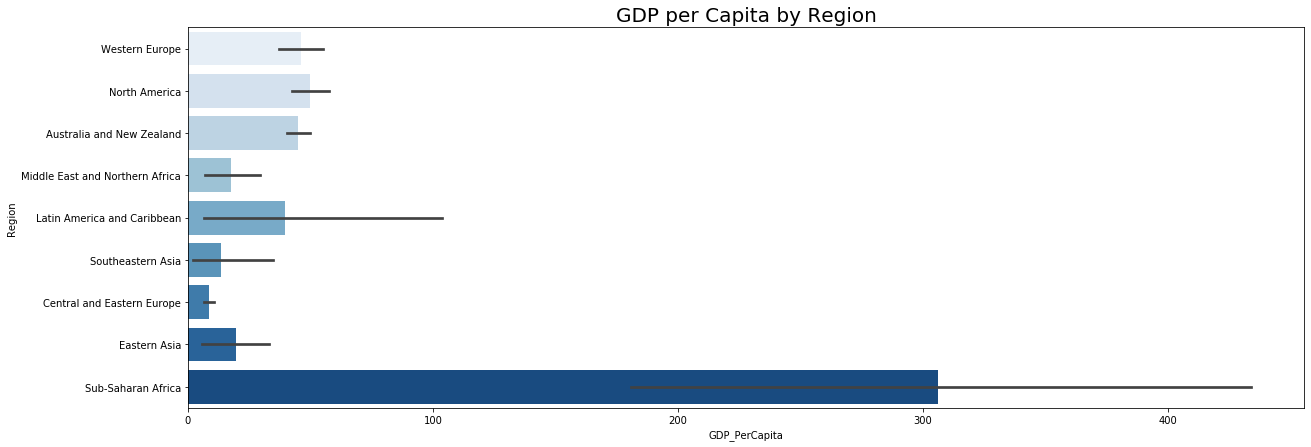

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='GDP_PerCapita', y='Region', palette='Blues')
plt.title('GDP per Capita by Region', fontsize = 20)
plt.show()

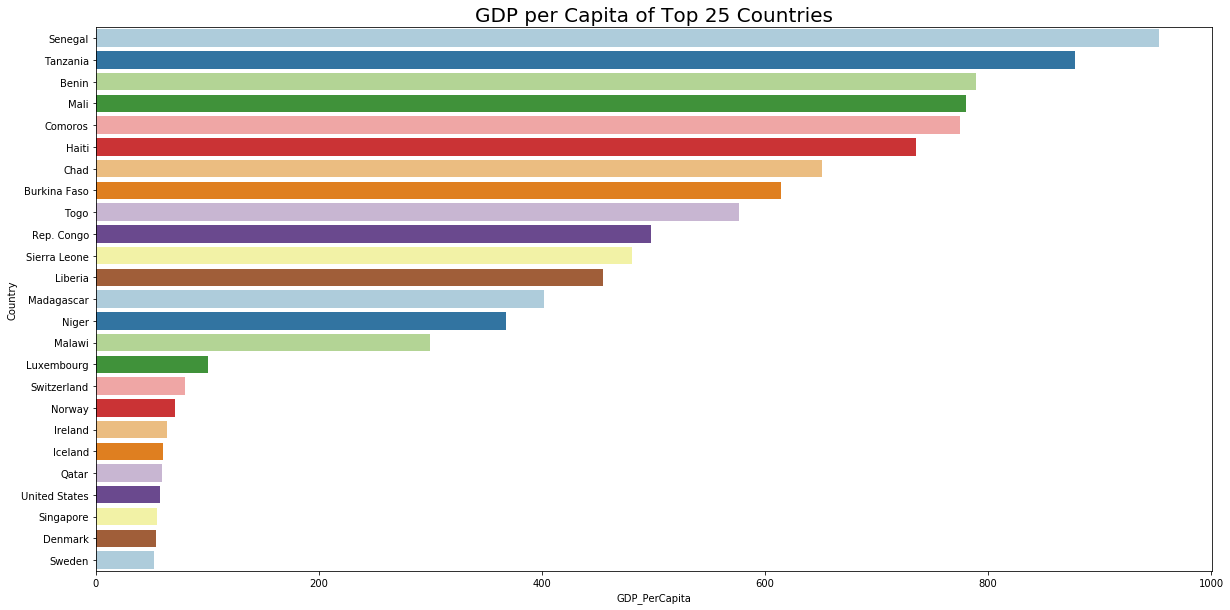

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nlargest(25,'GDP_PerCapita'), x='GDP_PerCapita', y='Country', palette='Paired')
plt.title('GDP per Capita of Top 25 Countries', fontsize = 20)
plt.show()

Tampaknya ada yang keliru dengan data GDP dalam dataset ini, karena jika kita riset kembali melalui Google menunjukkan bahwa Liberia tidak memiliki GDP lebih tinggi dari Swedia.

**Dengan mempertimbangkan hal ini, terlihat tidak masuk akal untuk melihat visualisasi data tersebut sebagai sumber GDP Negara**

### Human Develompent Index (HDI)

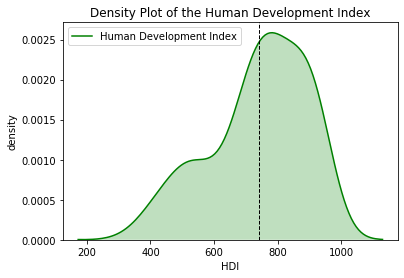

In [24]:
sns.kdeplot(df['HDI'], color='green', shade=True, Label='Human Development Index')
plt.axvline(df['HDI'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel('HDI')
plt.ylabel('density')
plt.title('Density Plot of the Human Development Index')
plt.show()

- **HDI x Region**

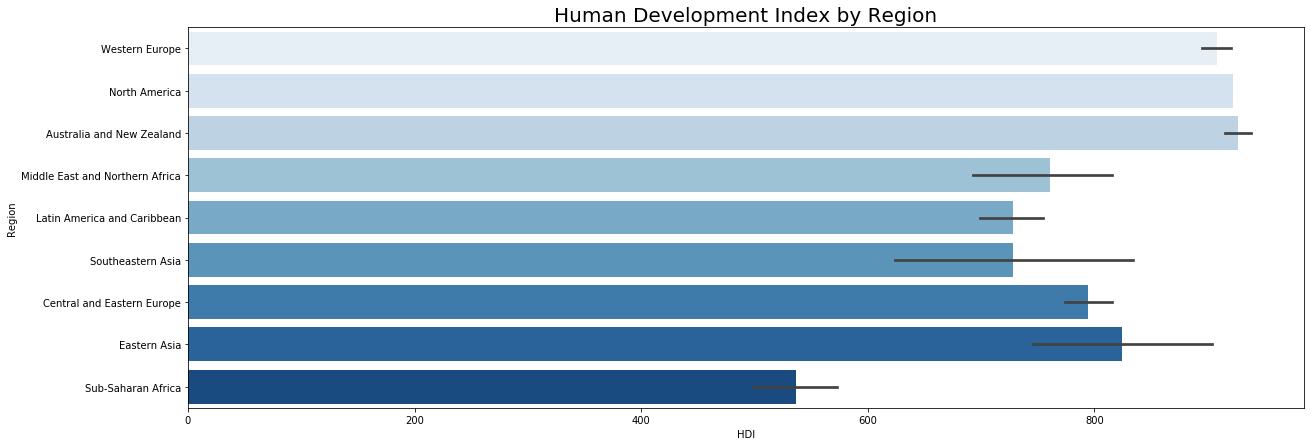

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='HDI', y='Region', palette='Blues')
plt.title('Human Development Index by Region', fontsize = 20)
plt.show()

- **HDI x Country**

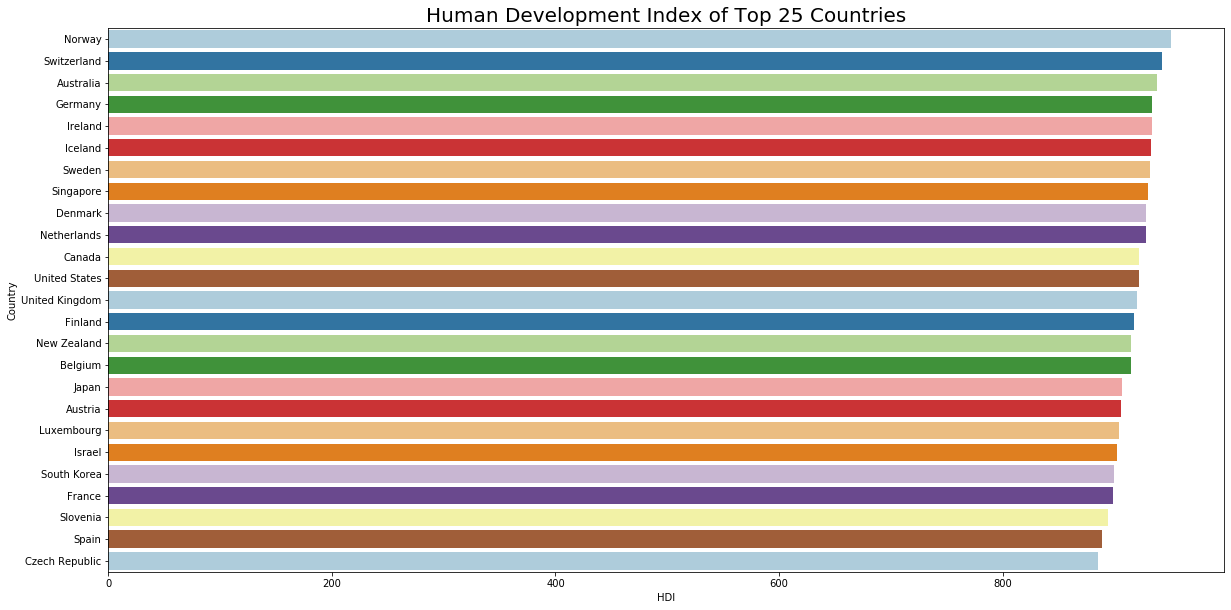

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nlargest(25,'HDI'), x='HDI', y='Country', palette='Paired')
plt.title('Human Development Index of Top 25 Countries', fontsize = 20)
plt.show()

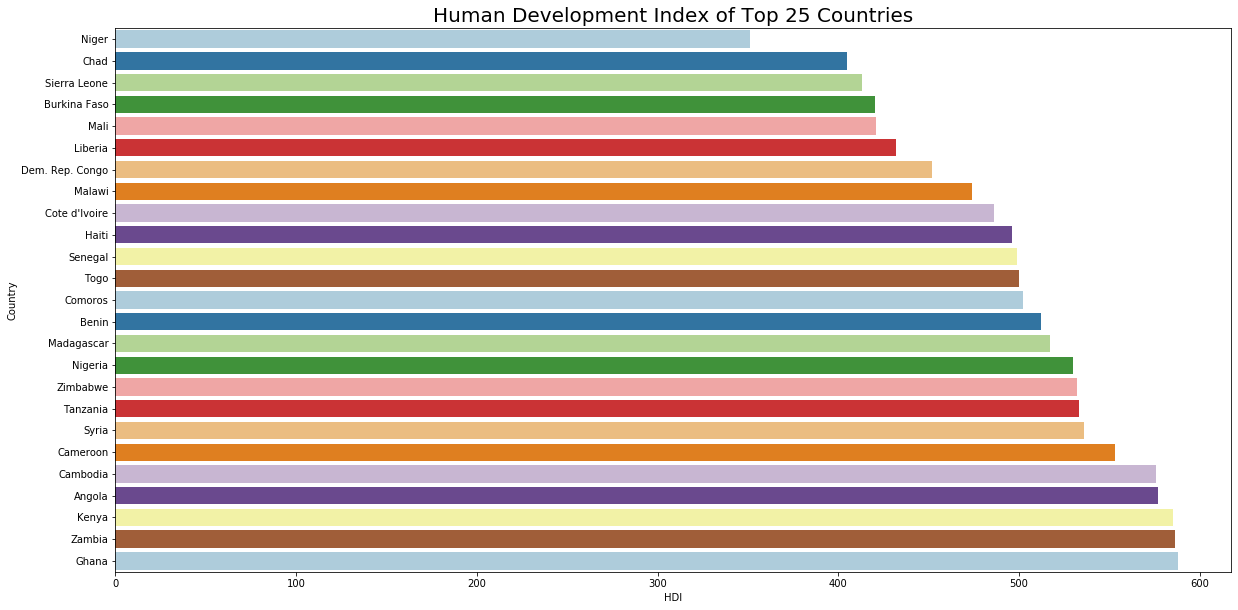

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nsmallest(25,'HDI'), x='HDI', y='Country', palette='Paired')
plt.title('Human Development Index of Top 25 Countries', fontsize = 20)
plt.show()

### Beer per Capita

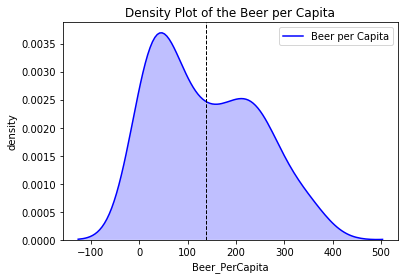

In [28]:
sns.kdeplot(df['Beer_PerCapita'], color='blue', shade=True, Label='Beer per Capita')
plt.axvline(df['Beer_PerCapita'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Beer_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Beer per Capita')
plt.show()

- **Beer per Capita x Region**

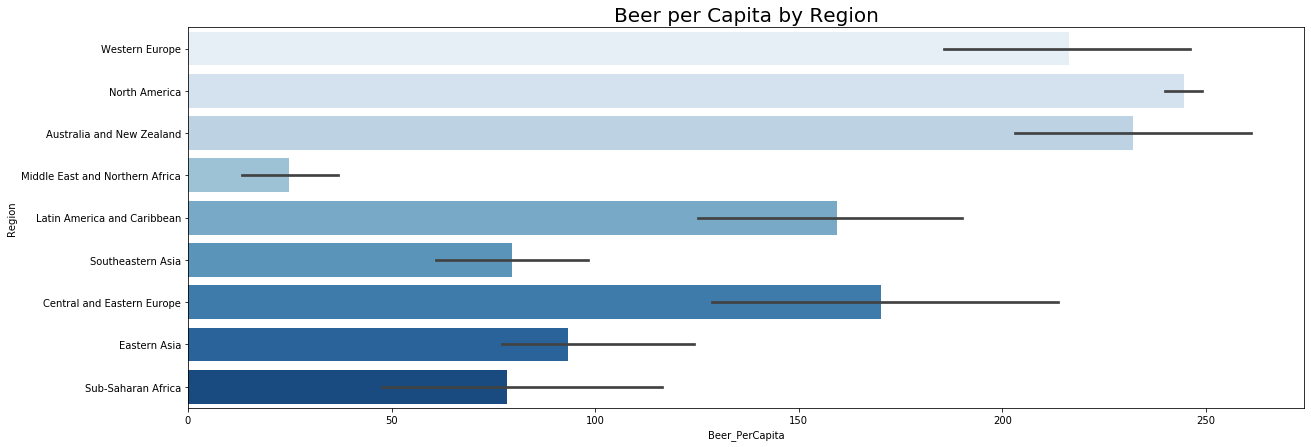

In [29]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='Beer_PerCapita', y='Region', palette='Blues')
plt.title('Beer per Capita by Region', fontsize = 20)
plt.show()

- **Beer per Capita x Country**

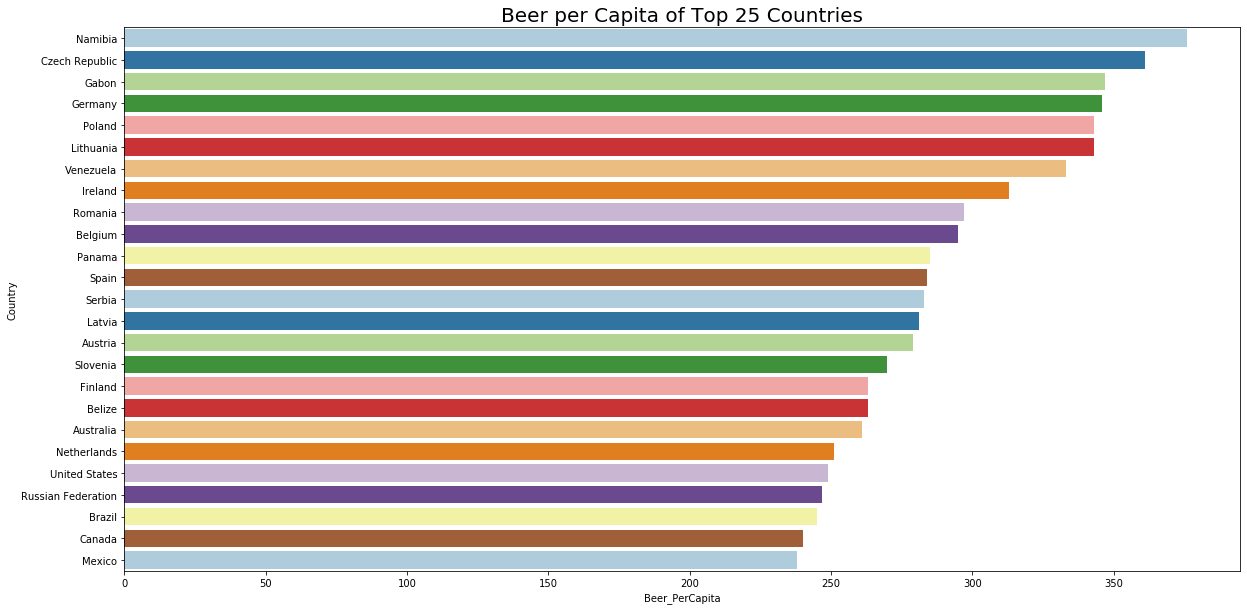

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nlargest(25,'Beer_PerCapita'), x='Beer_PerCapita', y='Country', palette='Paired')
plt.title('Beer per Capita of Top 25 Countries', fontsize = 20)
plt.show()

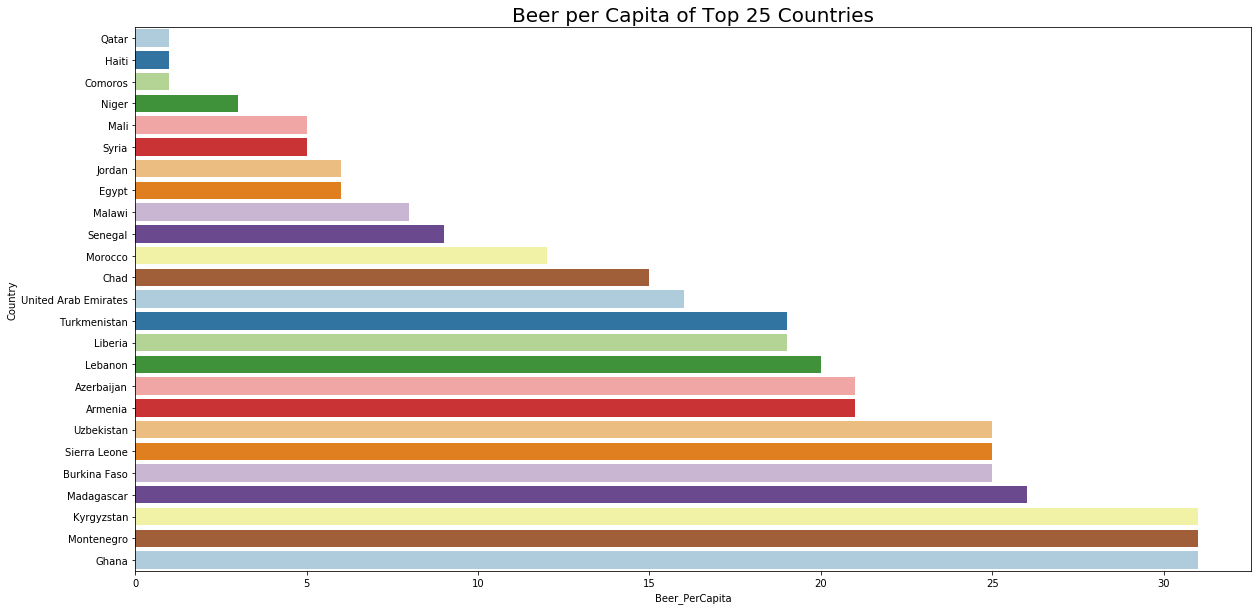

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nsmallest(25,'Beer_PerCapita'), x='Beer_PerCapita', y='Country', palette='Paired')
plt.title('Beer per Capita of Top 25 Countries', fontsize = 20)
plt.show()

### Spirit per Capita

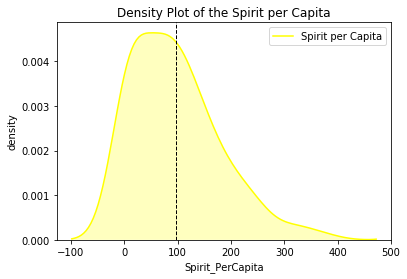

In [36]:
sns.kdeplot(df['Spirit_PerCapita'], color='yellow', shade=True, Label='Spirit per Capita')
plt.axvline(df['Spirit_PerCapita'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Spirit_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Spirit per Capita')
plt.show()

- **Spirit per Capita x Region**

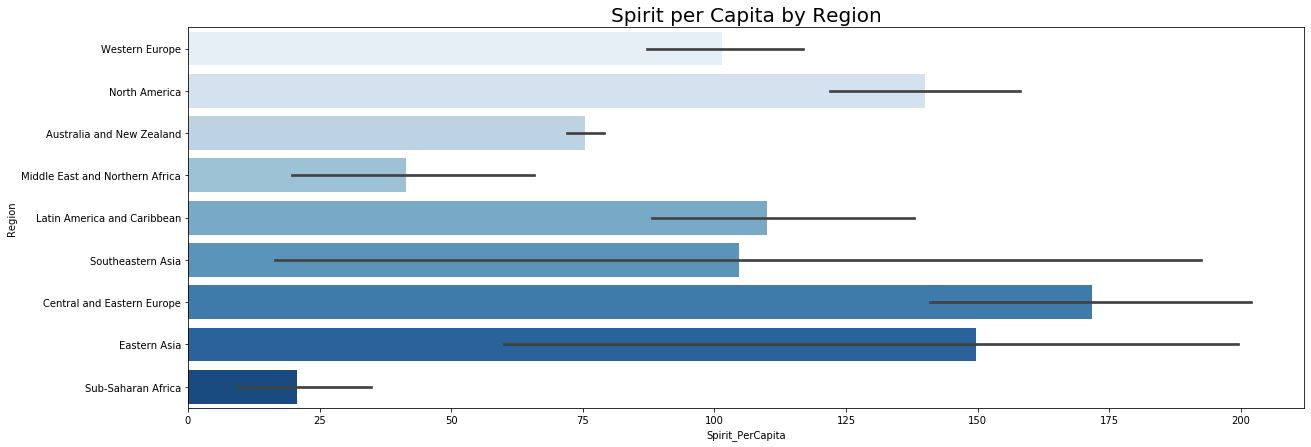

In [37]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='Spirit_PerCapita', y='Region', palette='Blues')
plt.title('Spirit per Capita by Region', fontsize = 20)
plt.show()

- **Spirit per Capita x Country**

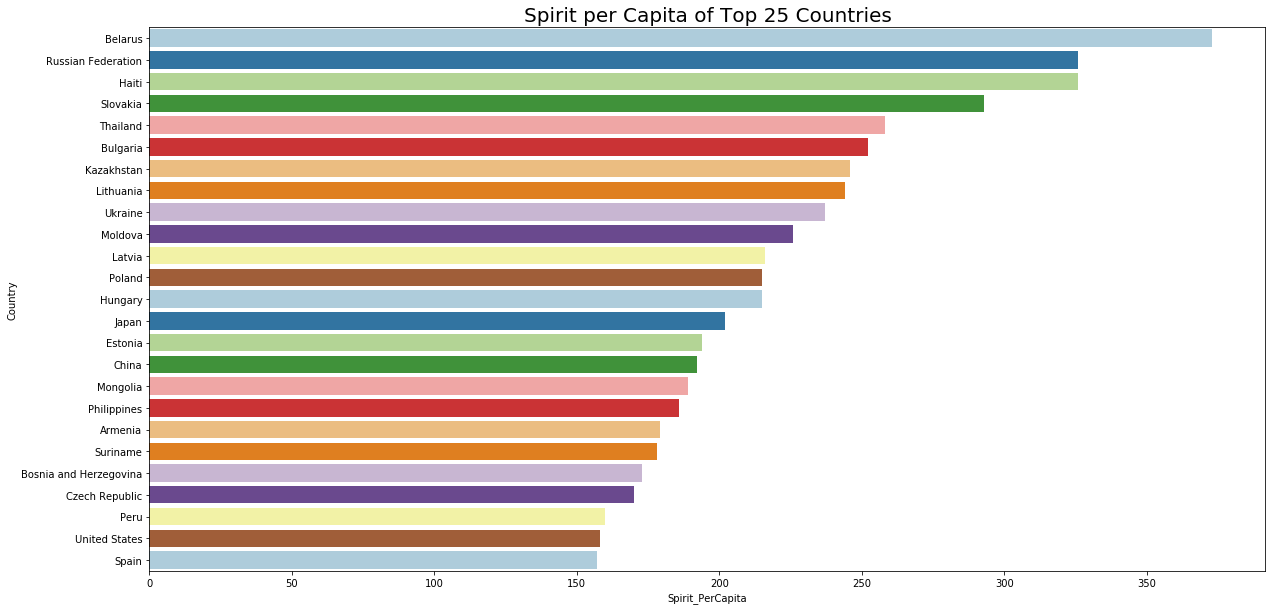

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nlargest(25,'Spirit_PerCapita'), x='Spirit_PerCapita', y='Country', palette='Paired')
plt.title('Spirit per Capita of Top 25 Countries', fontsize = 20)
plt.show()

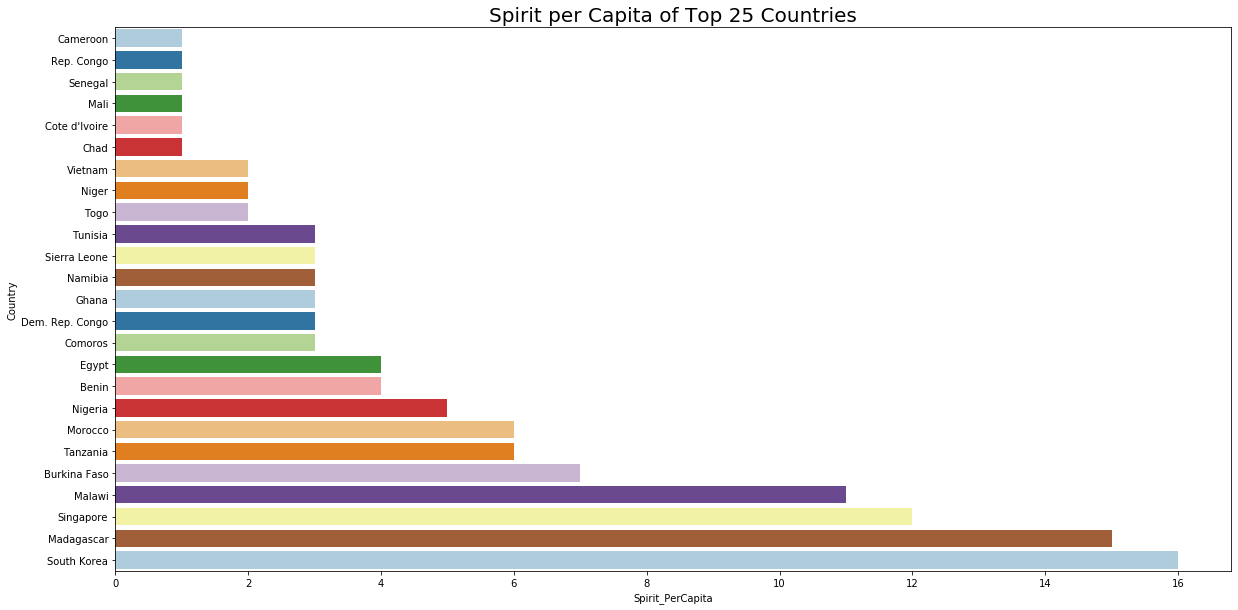

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nsmallest(25,'Spirit_PerCapita'), x='Spirit_PerCapita', y='Country', palette='Paired')
plt.title('Spirit per Capita of Top 25 Countries', fontsize = 20)
plt.show()

### Wine per Capita

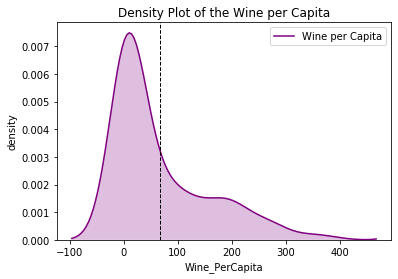

In [40]:
sns.kdeplot(df['Wine_PerCapita'], color='purple', shade=True, Label='Wine per Capita')
plt.axvline(df['Wine_PerCapita'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Wine_PerCapita')
plt.ylabel('density')
plt.title('Density Plot of the Wine per Capita')
plt.show()

- **Wine per Capita x Region**

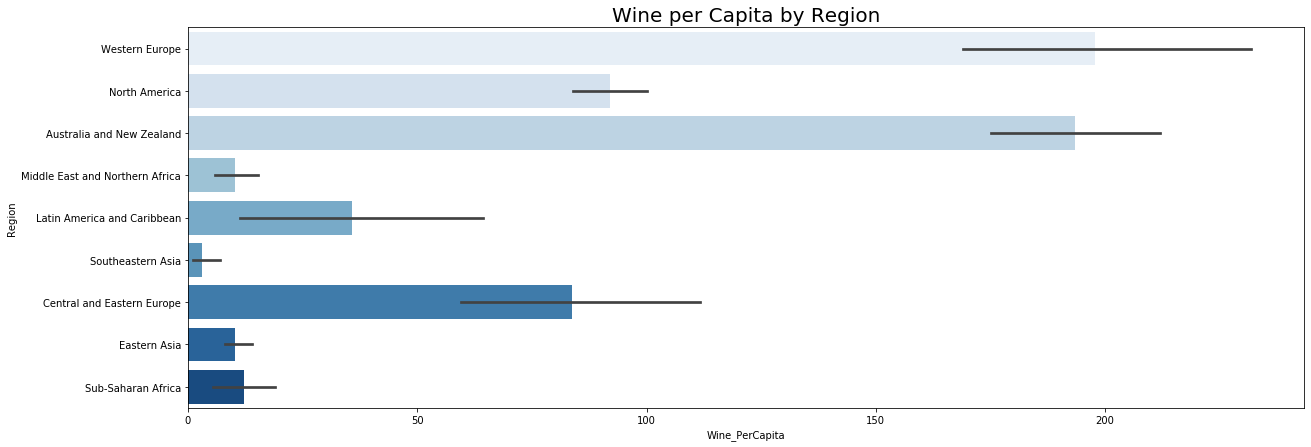

In [41]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x='Wine_PerCapita', y='Region', palette='Blues')
plt.title('Wine per Capita by Region', fontsize = 20)
plt.show()

- **Wine per Capita x Country**

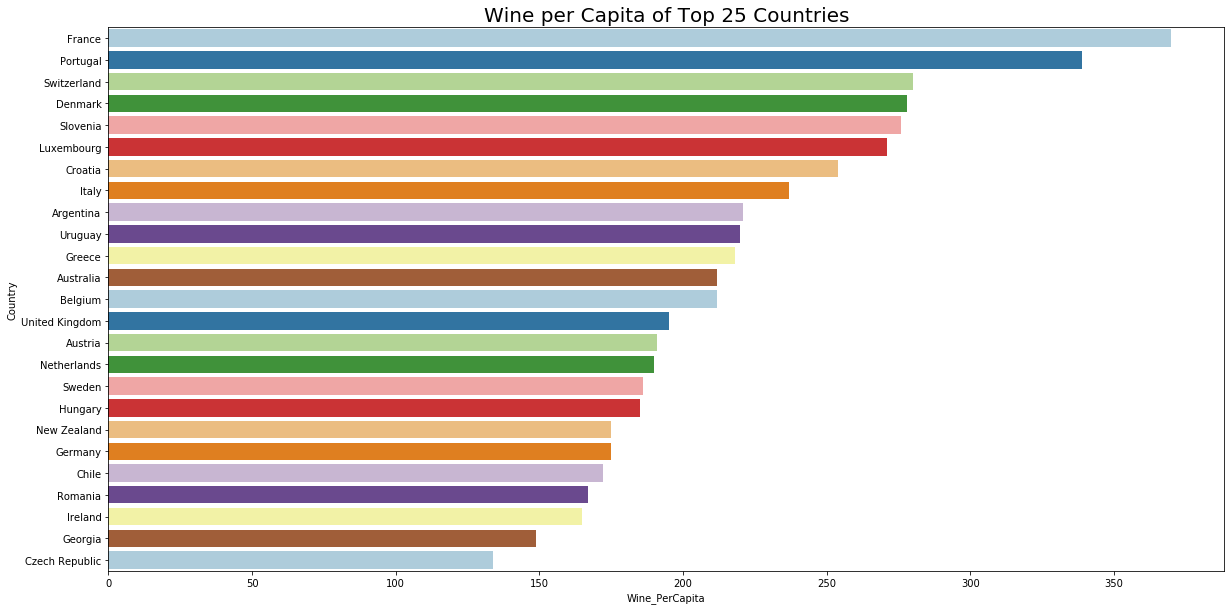

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nlargest(25,'Wine_PerCapita'), x='Wine_PerCapita', y='Country', palette='Paired')
plt.title('Wine per Capita of Top 25 Countries', fontsize = 20)
plt.show()

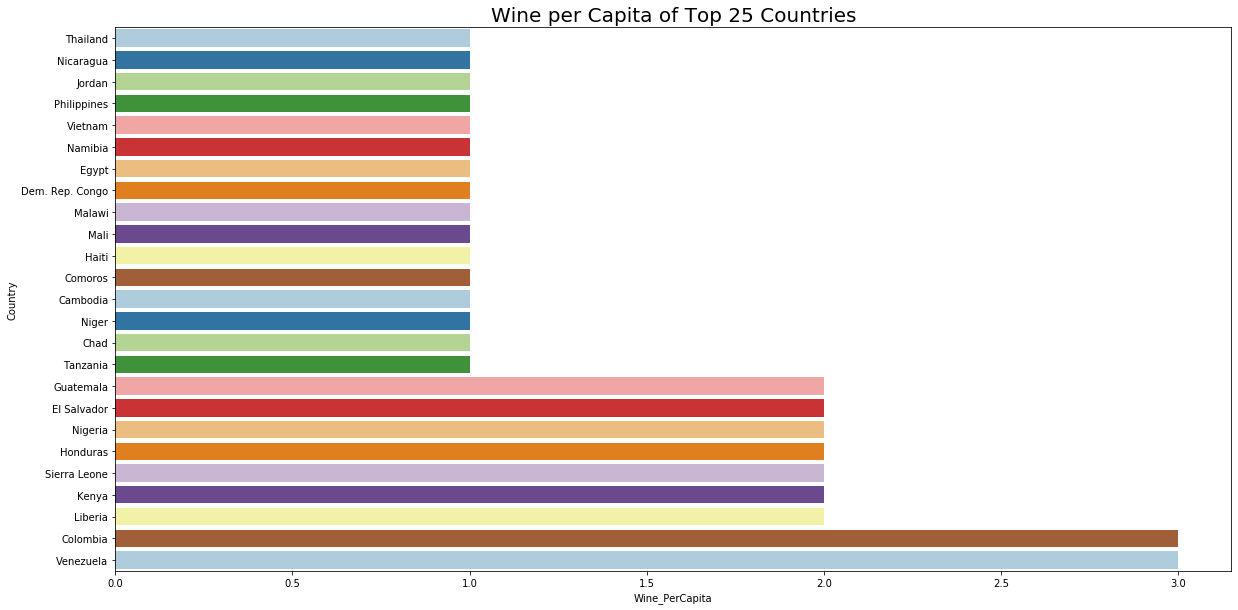

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.nsmallest(25,'Wine_PerCapita'), x='Wine_PerCapita', y='Country', palette='Paired')
plt.title('Wine per Capita of Top 25 Countries', fontsize = 20)
plt.show()